# Verification of the narrow-line Seyfert 1 galaxies
Here, we verify if the Seyfert galaxies classified as Type-1 with narrow lines (NLSy1), show any difference with respect to a typical Seyfert 1 galaxy (Sy1). These NLSy1 galaxies were used in the project as Sy1 galaxies.
First, we import the packages for the analysis

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
from scipy.stats import ks_2samp
import matplotlib.lines as mlines

import astropy.units as u
from astropy.table import Table, join

In [3]:
def critical_val(size1, size2, alpha=0.05):
    """Critical value for the KS two sample test"""
    section1 = -np.log(alpha/2)
    section2 = 1+(size2/size1)
    section3 = 2*size2
    return np.sqrt(section1*(section2/section3))

## Join Information
We read the list of S1n galaxies and compare them with the clean sample coming from SKIRTOR. We then split the galaxies in original S1n and Sy1.

In [4]:
S1n = Table.read('../Data/Complementary/NLS1_reclass.txt', format='ascii')
S1n.rename_column('main_id', 'id')  # Renamed to use the join with the same id

ModelS = Table.read('../Data/Final/CIGALEOutputs/Cleanresults_SK.fits', format='fits')

Sample = Table.read('../Data/Final/VCV_SMB_otype.txt', format='ascii')
Sample.rename_column('main_id', 'id')  # Renamed to use the join with the same id

In [5]:
SPandas = join(Sample, ModelS, keys='id').to_pandas()

In [6]:
NoS1n = [SPandas['id'][sd] not in S1n['id'] for sd in range(len(SPandas))]
YesS1n = [SPandas['id'][sd] in S1n['id'] for sd in range(len(SPandas))]
OnlyS1 = np.logical_and(NoS1n, SPandas['Sp'] == 'S1')

In [7]:
SPandas['Sey1s'] = np.empty(len(SPandas), dtype='str')
SPandas.loc[OnlyS1, 'Sey1s'] = 'Sy1'
SPandas.loc[YesS1n, 'Sey1s'] = 'S1n'

In [8]:
print('Total number of Seyfert 1:', sum(SPandas['Sp'] == 'S1'))
print('Total number of NLSy1 reclassified:', sum(SPandas['Sey1s'] == 'S1n'))
print('Total number of S1 without S1n:', sum(SPandas['Sey1s'] == 'Sy1'))

Total number of Seyfert 1: 5975
Total number of NLSy1 reclassified: 1407
Total number of S1 without S1n: 4568


The critical value for the KS test is going to be:

In [9]:
critical_val(sum(SPandas['Sey1s'] == 'S1n'), sum(SPandas['Sey1s'] == 'Sy1'))

0.04140865195256369

## Comparing AGN parameters
We compare the AGN physical parameters between the subset of NLSy1 and Sy1 galaxies. We added SFR the the comparison.

In [10]:
AGNParam = ['bayes.agn.EBV',
            'bayes.agn.fracAGN',
            'bayes.agn.i',
            'bayes.sfh.sfr',
            'bayes.agn.accretion_power',
            'bayes.agn.disk_luminosity',
            'bayes.agn.dust_luminosity',
            'bayes.agn.luminosity']
ParamLabel = ['Polar-dust E(B-V) [mag]', 'AGN Fraction',
              'Viewing angle [degrees]', r'SFR [log(M$_{\odot}$/yr)]',
              r'AGN accretion power [log(L$_{\odot}$)]',
              r'AGN disk luminosity [log(L$_{\odot}$)]',
              r'AGN dust luminosity [log(L$_{\odot}$)]',
              r'AGN total luminosity [log(L$_{\odot}$)]']
ParamRange = [[0, 1], [0.05, 0.95], [0, 90], [-3, 3]]

We change the units of the luminosities to log solar luminosities

In [11]:
for kisd in ['bayes.agn.luminosity', 'bayes.agn.disk_luminosity', 'bayes.agn.dust_luminosity',
             'bayes.agn.accretion_power']:
    SPandas[kisd] = np.log10((SPandas[kisd].values*u.W).to(u.solLum).value)
    SPandas[kisd+'_err'] = (SPandas[kisd+'_err'].values * u.W).to(u.solLum).value
SPandas['bayes.sfh.sfr'] = np.log10((SPandas['bayes.sfh.sfr']))

##### FIGURE A1
Finally, we compare the probability distributions for both types. We also calculate the median and plot it in the figure.

KstestResult(statistic=0.14314218250752742, pvalue=5.440092820663267e-15)
For bayes.agn.EBV the median of NLSy1 is 0.11
For bayes.agn.EBV the median of Sy1 is 0.18
KstestResult(statistic=0.11029478576594137, pvalue=7.480793762226767e-12)
For bayes.agn.fracAGN the median of NLSy1 is 0.49
For bayes.agn.fracAGN the median of Sy1 is 0.44
KstestResult(statistic=0.08411625883591799, pvalue=4.505864865667064e-07)
For bayes.agn.i the median of NLSy1 is 26.04
For bayes.agn.i the median of Sy1 is 25.87
KstestResult(statistic=0.17856193762237102, pvalue=5.440092820663267e-15)
For bayes.sfh.sfr the median of NLSy1 is 1.19
For bayes.sfh.sfr the median of Sy1 is 0.94
KstestResult(statistic=0.2453136494161666, pvalue=5.440092820663267e-15)
For bayes.agn.accretion_power the median of NLSy1 is 11.29
For bayes.agn.accretion_power the median of Sy1 is 11.00
KstestResult(statistic=0.24730970491550255, pvalue=5.440092820663267e-15)
For bayes.agn.disk_luminosity the median of NLSy1 is 11.25
For bayes.agn.di

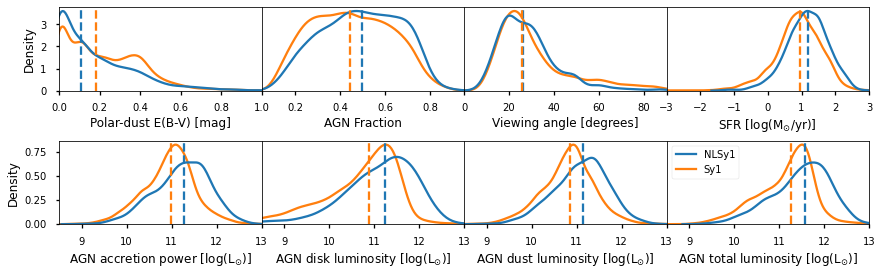

In [14]:
%matplotlib inline
# with plt.style.context('seaborn-talk'):
with plt.style.context('seaborn-paper'):
    plt.rcParams.update({'font.size': 12})
    plt.rcParams.update({'axes.labelsize': 12})
    plt.rcParams.update({'legend.fontsize': 10})
    plt.rcParams.update({'ytick.labelsize': 10})
    plt.rcParams.update({'xtick.labelsize': 10})
    _, ((ax1, ax2, ax3, ax4),
        (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(14.06, 3.77))
    axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
    for i_par, param in enumerate(AGNParam):
        sns.kdeplot(data=SPandas, x=param, hue='Sey1s', ax=axs[i_par],
                    common_norm=False, hue_order=['S1n', 'Sy1'])
        if i_par not in [0, 4]:
            axs[i_par].set_yticks([])
        SetS1n = SPandas[param][SPandas['Sey1s'] == 'S1n']
        SetSy1 = SPandas[param][SPandas['Sey1s'] == 'Sy1']
        print(ks_2samp(SetS1n, SetSy1))
        med_s1n = np.median(SPandas[param][SPandas['Sey1s'] == 'S1n'])
        med_s1 = np.median(SPandas[param][SPandas['Sey1s'] == 'Sy1'])
        axs[i_par].axvline(med_s1n, ls='--', c='C0')
        axs[i_par].axvline(med_s1, ls='--', c='C1')
        print('For %s the median of NLSy1 is %1.2f' % (param, med_s1n))
        print('For %s the median of Sy1 is %1.2f' % (param, med_s1))
        if i_par >= 4:
            axs[i_par].set_xlim(8.5, 13)
        else:
            axs[i_par].set_xlim(ParamRange[i_par][0], ParamRange[i_par][1])
        if ~np.logical_xor(i_par != 0, i_par != 4):
            axs[i_par].set_ylabel(None)
        axs[i_par].set_xlabel(ParamLabel[i_par])
        axs[i_par].get_legend().remove()
    plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1,
                        right=0.9, hspace=0.6, wspace=0)
    S1_n = mlines.Line2D([], [], color='C0', label='NLSy1', ls='-')
    S1_b = mlines.Line2D([], [], color='C1', label='Sy1', ls='-')
    axs[-1].legend(handles=[S1_n, S1_b], loc='upper left')
    plt.savefig('../Figures/A1.pdf', dpi=300, bbox_inches='tight')  # For Paper
#     plt.savefig('../Talk_Figures/A1.png',dpi=300,bbox_inches = 'tight') ## For Presentation

##### Notebook info

In [13]:
%load_ext watermark
%watermark -a "Andres Ramos" -d -v -m
print('Specific Python packages')
%watermark -iv -w

Author: Andres Ramos

Python implementation: CPython
Python version       : 3.8.3
IPython version      : 7.16.1

Compiler    : GCC 7.3.0
OS          : Linux
Release     : 3.10.0-1160.25.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Specific Python packages
autopep8  : 1.5.7
astropy   : 4.2
re        : 2.2.1
matplotlib: 3.2.2
json      : 2.0.9
seaborn   : 0.11.1
numpy     : 1.19.5
logging   : 0.5.1.2
sys       : 3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]

Watermark: 2.1.0

